# Chapter 3 - Gravitational-wave detector Data

This notebook describes how to discover what data are available from the [Gravitational-Wave Open Science Center (GWOSC)](https://www.gw-openscience.org). It is inpired from the tutorials available as part of the [open data workshop](https://github.com/gw-odw).

## Imports
We will need some standard imports for this notebook:

In [1]:
! pip install matplotlib==3.1.3 # Latest version of matplotlib with gwpy causes ImportError: cannot import name '_png' from 'matplotlib'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp38-cp38-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.3
    Uninstalling matplotlib-3.6.3:
      Successfully uninstalled matplotlib-3.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gwpy 3.0.2 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.


In [2]:
import matplotlib.pyplot as plt
import numpy as np

And the gravitational-wave specific [gwpy](https://gwpy.github.io/), a "collaboration-driven Python package providing tools for studying data from ground-based gravitational-wave detectors". This is the main software used to interface to the common time-domain and frequency-domain data produced by the LIGO and Virgo instruments and their analysis. In addition, note that the main author of this package works at Cardiff University...

In [3]:
! pip install -q gwpy

**Important:** With Google Colab, you may need to restart the runtime after running the cell above.

## Querying for event information

Installing `gwpy` does also install the package `gwosc`. The module `gwosc.datasets` provides tools for searching for datasets: full run strain data releases, gravitational-wave events, and catalogues of events.

For example, we can search for events in the [GWTC-1 catalog](https://www.gw-openscience.org/eventapi/html/GWTC-1-confident/), the catalog of all events from the O1 and O2 observing runs.  A list of available catalogs can be seen in the [Event Portal](https://gw-openscience.org/eventapi)

In [4]:
from gwosc.datasets import find_datasets

#-- Print all the GW events from the GWTC-1 catalog 
gwtc1 = find_datasets(catalog='GWTC-1-confident',type='events')
print('GWTC-1 events:', gwtc1)
print("")

#-- Print all the large strain data sets from LIGO/Virgo observing runs
runs = find_datasets(type='run')
print('Large data sets:', runs)

GWTC-1 events: ['GW150914-v3', 'GW151012-v3', 'GW151226-v2', 'GW170104-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v3', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1']

Large data sets: ['BKGW170608_16KHZ_R1', 'O1', 'O1_16KHZ', 'O2_16KHZ_R1', 'O2_4KHZ_R1', 'O3GK_16KHZ_R1', 'O3GK_4KHZ_R1', 'O3a_16KHZ_R1', 'O3a_4KHZ_R1', 'O3b_16KHZ_R1', 'O3b_4KHZ_R1', 'S5', 'S6']


`find_datasets` also accepts a `segment` and `detector` keyword to narrow results based on GPS time and detector:

In [5]:
#-- Detector and segments keywords limit search result
print(find_datasets(catalog='GWTC-1-confident', detector="L1", segment=(1164556817, 1187733618),type='events'))

['GW170104-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v3', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1']


Using `gwosc.datasets.event_gps`, we can query for the GPS time of a specific event:

In [6]:
from gwosc.datasets import event_gps
gps = event_gps('GW190425')
print(gps)

1240215503.0


All of these times are returned in the GPS time system, which counts the number of seconds that have elapsed since the start of the GPS epoch at midnight (00:00) on January 6th 1980. GWOSC provides a [GPS time converter](https://www.gw-openscience.org/gps/) you can use to translate into datetime, or you can use [gwpy.time](https://gwpy.github.io/docs/stable/time/).

In [7]:
from gwpy.time import to_gps
from gwpy.time import from_gps

In [8]:
print(from_gps(gps))

2019-04-25 08:18:05


We can query for the GPS time interval for an observing run:

In [9]:
from gwosc.datasets import run_segment
print(run_segment('O1'))

(1126051217, 1137254417)


To see only the confident events in O1:

In [10]:
O1_events = find_datasets(catalog='GWTC-1-confident', segment=run_segment('O1'))
print(O1_events)

['GW150914-v3', 'GW151012-v3', 'GW151226-v2', 'GWTC-1-confident', 'GWTC-1-marginal', 'GWTC-2', 'GWTC-2.1-auxiliary', 'GWTC-2.1-confident', 'GWTC-2.1-marginal', 'GWTC-3-confident', 'GWTC-3-marginal', 'Initial_LIGO_Virgo', 'O1', 'O1_16KHZ', 'O1_O2-Preliminary', 'O3_Discovery_Papers', 'O3_IMBH_marginal']


Note on "events": some "events" that have datasets are not necessarily gravitational-wave detection. For instance, the last element of `find_datasets(type='event')`:

In [11]:
find_datasets(type='event')[-1]

'blind_injection-v1'

is a "blind injection" experiment that happened in:

In [12]:
print(from_gps(event_gps('blind_injection-v1')))

2010-09-16 06:42:22.900000


This was a test, and you can read more about this procedure [here](https://www.ligo.org/news/blind-injection.php). To eliminate those datasets, we can specify that the events names should include "GW", the stamp the collaboration gives to verified gravitational-wave signals:

In [13]:
print(find_datasets(type='event',match='GW'))

['GW150914-v1', 'GW150914-v2', 'GW150914-v3', 'GW151012-v1', 'GW151012-v2', 'GW151012-v3', 'GW151226-v1', 'GW151226-v2', 'GW170104-v1', 'GW170104-v2', 'GW170608-v1', 'GW170608-v2', 'GW170608-v3', 'GW170729-v1', 'GW170809-v1', 'GW170814-v1', 'GW170814-v2', 'GW170814-v3', 'GW170817-v1', 'GW170817-v2', 'GW170817-v3', 'GW170818-v1', 'GW170823-v1', 'GW190403_051519-v1', 'GW190408_181802-v1', 'GW190408_181802-v2', 'GW190412-v1', 'GW190412-v2', 'GW190412-v3', 'GW190412_053044-v4', 'GW190413_052954-v1', 'GW190413_052954-v2', 'GW190413_134308-v1', 'GW190413_134308-v2', 'GW190421_213856-v1', 'GW190421_213856-v2', 'GW190424_180648-v1', 'GW190424_180648-v2', 'GW190425-v1', 'GW190425-v2', 'GW190425_081805-v3', 'GW190426_152155-v1', 'GW190426_152155-v2', 'GW190426_190642-v1', 'GW190503_185404-v1', 'GW190503_185404-v2', 'GW190512_180714-v1', 'GW190512_180714-v2', 'GW190513_205428-v1', 'GW190513_205428-v2', 'GW190514_065416-v1', 'GW190514_065416-v2', 'GW190517_055101-v1', 'GW190517_055101-v2', 'GW1905

**Question**
- Plot a histogram of the number events detected as a function of time. You can use `list(set([1,1,2,3]))` to only return unique elements of a list, as there are several dataset versions per event.

## Querying for data files

The `gwosc.locate` module provides a function to find the URLs of data files associated with a given dataset.

For event datasets, one can get the list of URLs using only the event name:

In [14]:
from gwosc.locate import get_event_urls
urls = get_event_urls('GW150914')
print(urls)

['https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126259447-32.hdf5', 'https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_4KHZ_R1-1126257415-4096.hdf5', 'https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_4KHZ_R1-1126259447-32.hdf5', 'https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_4KHZ_R1-1126257415-4096.hdf5']


By default, this function returns all of the files associated with a given event, which isn't particularly helpful. However, we can can filter on any of these by using keyword arguments, for example to get the URL for the 32-second file for the LIGO-Livingston detector:

In [15]:
urls = get_event_urls('GW150914', duration=32, detector='L1')
print(urls)

['https://www.gw-openscience.org/eventapi/json/GWTC-1-confident/GW150914/v3/L-L1_GWOSC_4KHZ_R1-1126259447-32.hdf5']


## Locating data URLs by GPS interval

You can search for remote data URLs based on the GPS time interval as
follows:

In [16]:
from gwosc.locate import get_urls

In [17]:
get_urls('L1', 968650000, 968660000)

['https://www.gw-openscience.org/archive/data/S6/967835648/L-L1_LOSC_4_V1-968646656-4096.hdf5',
 'https://www.gw-openscience.org/archive/data/S6/967835648/L-L1_LOSC_4_V1-968650752-4096.hdf5',
 'https://www.gw-openscience.org/archive/data/S6/967835648/L-L1_LOSC_4_V1-968654848-4096.hdf5',
 'https://www.gw-openscience.org/archive/data/S6/967835648/L-L1_LOSC_4_V1-968658944-4096.hdf5']

This arguments for this function are as follows

-   `detector` : the prefix of the relevant gravitational-wave
    interferometer, either `'H1'` for LIGO-Hanford, or `'L1'` for LIGO
    Livingston,
-   `start`: the GPS start time of the interval of interest
-   `end`: the GPS end time of the interval of interest

By default, this method will return the paths to HDF5 files for the 4
kHz sample-rate data, these can be specified as keyword arguments. For
full information, run

In [18]:
help(get_urls)

Help on function get_urls in module gwosc.locate:

get_urls(detector, start, end, dataset=None, tag=None, version=None, sample_rate=4096, format='hdf5', host='https://www.gw-openscience.org')
    Fetch the URLs from GWOSC regarding a given GPS interval
    
    Parameters
    ----------
    detector : `str`
        the prefix of the relevant GW detector
    
    start : `int`
        the GPS start time of your query
    
    end : `int`
        the GPS end time of your query
    
    dataset : `str`, `None`, optional
        the name of the dataset to query, e.g. ``'GW150914'``
    
    version : `int`, `None`, optional
        the data-release version for the selected datasets
    
    sample_rate : `int`, optional, default : ``4096``
        the sampling rate (Hz) of files you want to find
    
    format : `str`, optional, default: ``'hdf5'``
        the file format (extension) you want to find
    
    host : `str`, optional
        the URL of the remote GWOSC server
    
    Retur

## Downloading data

The next thing to do is to actually read some open data. Let's try to get some for GW190521, the heaviest BBH (binary black hole system) detected with gravitational-waves.

We can use the [`TimeSeries.fetch_open_data`](https://gwpy.github.io/docs/stable/api/gwpy.timeseries.TimeSeries.html#gwpy.timeseries.TimeSeries.fetch_open_data) method to download data directly from https://www.gw-openscience.org, but we need to know the GPS times.
We can query for the GPS time of an event as follows:

In [19]:
gps = event_gps('GW190521')
print(gps)

1242442967.4


Now we can build a `[start, end)` GPS segment of 32 seconds around this time, using integers for convenience:

In [20]:
segment = (int(gps)-16, int(gps)+16)
print(segment)

(1242442951, 1242442983)


and can now query for the full data. We will get data from LIGO-Livingston, LIGO-Hanford and Virgo using the identifiers `'L1'`,`'H1'` and `'V1'`. We can in general choose any of:

- `'G1`' - GEO600
- `'H1'` - LIGO-Hanford
- `'L1'` - LIGO-Livingston
- `'V1'` - (Advanced) Virgo
- `'K1'` - KAGRA

If data is available for those observatories at that time, which we can check by looking at the [status of the detectors at the time of the event](https://www.gw-openscience.org/detector_status/day/20190521/).

In [21]:
from gwpy.timeseries import TimeSeries
ldata = TimeSeries.fetch_open_data('L1', *segment)
hdata = TimeSeries.fetch_open_data('H1', *segment)
vdata = TimeSeries.fetch_open_data('V1', *segment)

**Note**: The data files are not stored permanently, so next time you do the same call, it will be downloaded again. Working on with cloud computing, that is usually a bottleneck of the overall analysis. Make sure you keep the operation of downloading the data in a separate cell, so you only run it once while you are working on the notebook.

Let's see what we have:

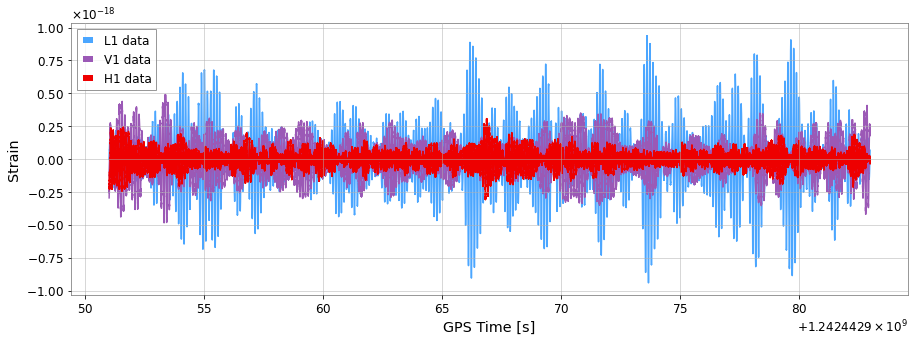

In [22]:
plt.figure(figsize=(15,5))
plt.plot(ldata.times,ldata,label='L1 data',color='gwpy:ligo-livingston')
plt.plot(vdata.times,vdata,label='V1 data',color='gwpy:virgo')
plt.plot(hdata.times,hdata,label='H1 data',color='gwpy:ligo-hanford')
plt.xlabel('GPS Time [s]')
plt.ylabel('Strain')
plt.legend();

Note: we do have predefined colors for each interferometer: keeping the same colour scheme helps with comparing graphs (for instance with the [status of the detectors at the time of the event](https://www.gw-openscience.org/detector_status/day/20190521/)).

Several things to note. The overall amplitude is higher than what we need, it's $O(10^{-19})$ instead of the typical $O(10^{-21})$ for the astrophysical signals we expect. If you remember the noise spectrum from the lecture, the noise is particularly large at low frequencies and at high frequencies. Let's compute the _Amplitude Spectral Density_ (ASD) of the data similar to what we saw in the lecture:

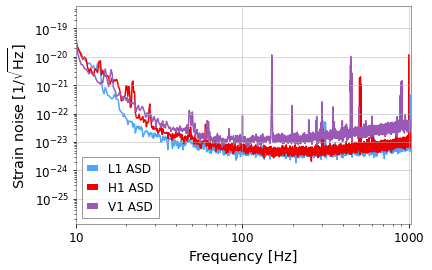

In [23]:
lasd=ldata.asd(fftlength=4)
hasd=hdata.asd(fftlength=4)
vasd=vdata.asd(fftlength=4)

plt.loglog(lasd.frequencies,lasd,label='L1 ASD',color='gwpy:ligo-livingston')
plt.loglog(hasd.frequencies,hasd,label='H1 ASD',color='gwpy:ligo-hanford')
plt.loglog(vasd.frequencies,vasd,label='V1 ASD',color='gwpy:virgo')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Strain noise [$1/\sqrt{\mathrm{Hz}}$]')
plt.xlim(10,1024)
plt.legend();

We will look at how to compute this aplitude spectrum density in details over the next two weeks, and for now we are just using it as a measure of how much noise there is at each frequency. From this plot, we may want to remove all data below 50Hz, as the noise is high below about 50Hz. In addition, as we know we are looking for the GW190521 signal, we can narrow down the frequency range further: from the [discovery paper](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.125.101102), that signal ends at about 80Hz. So we can safely remove the data above 100Hz. This is something we can only do here as we know ahead of the time the properties of the signal in the data...

To remove the data at those frequencies (<50Hz and >100z), we will use a _bandpass_ filter (which we will also look at into more details next week, alongside the ASD). We can also zoom in around the time of the event:

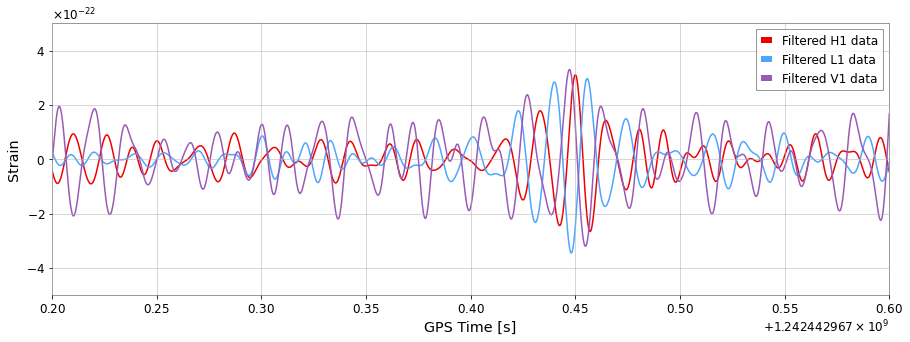

In [24]:
# bandpass the data, and only keep 4 seconds around the event's time:
hdata_bp=hdata.bandpass(50,100).crop(gps-2,gps+2)
ldata_bp=ldata.bandpass(50,100).crop(gps-2,gps+2)
vdata_bp=vdata.bandpass(50,100).crop(gps-2,gps+2)

plt.figure(figsize=(15,5))
plt.plot(hdata_bp.times,hdata_bp,label='Filtered H1 data', color='gwpy:ligo-hanford')
plt.plot(ldata_bp.times,ldata_bp,label='Filtered L1 data', color='gwpy:ligo-livingston')
plt.plot(vdata_bp.times,vdata_bp,label='Filtered V1 data', color='gwpy:virgo')
plt.xlabel('GPS Time [s]')
plt.ylabel('Strain')
plt.xlim(gps-0.2,gps+0.2)
plt.ylim(-5e-22, 5e-22)
plt.legend();

And we can now see the gravitational-wave signal, above the noise floor, in all three gravitational-wave detectors at around the same time. We can try to generate a signal with last week's notebook methods to compare:

In [25]:
! pip install -q pycbc

In [26]:
from pycbc.waveform import get_td_waveform

In [27]:
m1 = 85*(1+0.82) # mass in Solar masses
m2 = 66*(1+0.82) # mass in Solar masses

hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=m1,
                         mass2=m2,
                         delta_t=1./hdata.sample_rate.to_value(),
                         f_lower=50,
                         distance=9000,
                         coa_phase=np.pi/2)
hp.start_time=gps+0.044

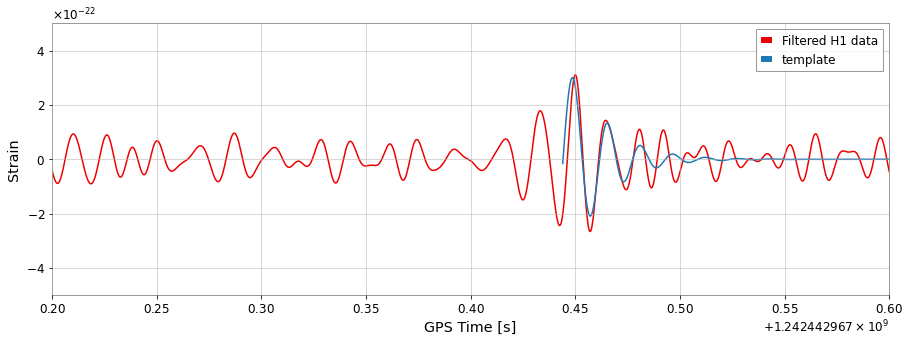

In [28]:
plt.figure(figsize=(15,5))
plt.plot(hdata_bp.times,hdata_bp,label='Filtered H1 data', color='gwpy:ligo-hanford')
plt.plot(hp.sample_times,hp,label='template')
plt.xlabel('GPS Time [s]')
plt.ylabel('Strain')
plt.xlim(gps-0.2,gps+0.2)
plt.ylim(-5e-22, 5e-22)
plt.legend();

**Questions**
- Why are the masses multiplied by a factor of (1+0.82) ?
- Can you venture some guesses are to why the distance entered here is much larger than the reported 5.3 Gpc from the publication?
- What happens if you try to fit this template to the other detector's data?

We can also have a look at the correlation of our template with the data:

In [29]:
from scipy.signal import correlate

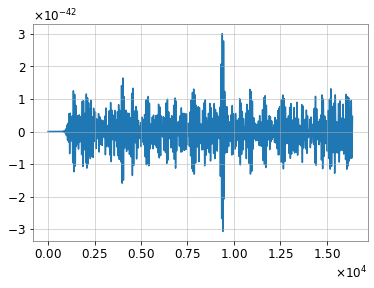

In [30]:
plt.plot(correlate(hdata_bp,hp,mode='same'))

We do see a peak where we would expect it, and this is an illustration of one of the core concepts of gravitational-wave data analysis (and by extention time-series analysis). We will look at this in a lot more details over the next few weeks...